In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

In [145]:
df = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])

In [146]:
df

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


Text(0, 0.5, 'exam2 2 score')

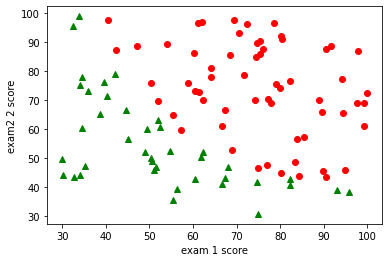

In [147]:
filter = df['admitted'] == 1

admitted = df.loc[filter]
not_admitted = df.loc[~filter]

plt.plot(admitted['exam1'], admitted['exam2'], 'ro', not_admitted['exam1'], not_admitted['exam2'], 'g^')
plt.xlabel('exam 1 score')
plt.ylabel('exam2 2 score')

In [212]:
data = df.to_numpy()
# m -> number of examples, n -> number of features
m, n = data.shape
y = data[:,-1].reshape(m,1)
x = data[:,:n-1].reshape(m, n-1)
x = np.concatenate((np.ones((m,1)), x), axis=1)

print(x.shape)
print(y.shape)

(100, 3)
(100, 1)


In [208]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def hypotesis(theta, x):
    #force the shape of the numpy array to avoid errors by the function
    #fmin_bfgs during matrix multiplication
    return sigmoid(np.dot(x, theta).reshape(100,1))

def cost(theta, x,y,m):
    return (1/m)*(-np.dot(np.transpose(y),np.log(hypotesis(theta,x))) - np.dot(np.transpose((1-y)), np.log(1-hypotesis(theta,x))))[0]

def grad(theta, x, y, m):
    #force the shape of the numpy array to avoid errors by the function
    #fmin_bfgs during matrix multiplication
    return (alpha/m)*np.dot(np.transpose(x), np.subtract(hypotesis(theta,x),y)).reshape(3,)

##############################################################
#Manualy gradient descent too slow compared with the fmin_bfgs,#
#shapes don't working properly because of the forced shapes#
##############################################################
# def gradient_descent(x, y, theta, iterations, alpha, m):
#     J = np.zeros((iterations,1))
#     for i in range(0, iterations):
#         theta -= (alpha/m)*np.dot(np.transpose(x), np.subtract(hypotesis(x, theta),y))
#         J[i] = cost(x,y, theta, m)
#     return theta, J

# gradient_descent(np.zeros((3,1)),x, y, 1500, 0.001, m)

In [214]:
theta = np.zeros((n,1))
fmin_bfgs(cost, theta, fprime=grad, args=(x,y,m))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35


array([-25.15475481,   0.20616501,   0.20145502])